In [5]:
pip install ydata-profiling

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

In [9]:
data = pd.read_csv("/dqlab_telco_final.csv")

print("Shape awal:", data.shape)
print("Missing values per kolom:\n", data.isnull().sum())
print("Jumlah duplikat:", data.duplicated().sum())

Shape awal: (6950, 13)
Missing values per kolom:
 UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Jumlah duplikat: 0


In [10]:
data = data.drop_duplicates()

for col in data.select_dtypes(include=[np.number]).columns:
    data[col] = data[col].fillna(data[col].median())

In [11]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [12]:
if "ID" in data.columns:
    data = data.drop(columns=["ID"])

In [13]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].str.lower().str.strip()

In [14]:
for col in data.select_dtypes(include=[np.number]).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Batasi nilai agar masuk range
    data[col] = np.where(data[col] < lower, lower,
                         np.where(data[col] > upper, upper, data[col]))

In [15]:
print("\n=== Info Setelah Cleaning ===")
print("Shape akhir:", data.shape)
print("Missing values per kolom:\n", data.isnull().sum())
print("Jumlah duplikat:", data.duplicated().sum())
print("="*40)

print("\nPreview 10 baris pertama data hasil cleaning:")
print(data.head(10))


=== Info Setelah Cleaning ===
Shape akhir: (6950, 13)
Missing values per kolom:
 UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Jumlah duplikat: 0

Preview 10 baris pertama data hasil cleaning:
   UpdatedAt    customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0   202006.0  4.575902e+10  female            no     yes     1.0           no   
1   202006.0  4.531548e+10    male            no     yes    60.0          yes   
2   202006.0  4.523696e+10    male            no      no     5.0          yes   
3   202006.0  4.592983e+10  female            no     yes    72.0          yes   
4   202006.0  4.530508e+10  female            no     yes    56.0          yes   
5   202006.0  4.507236e+10    male            no      no    44.0   

In [16]:
print("=== Data Quality Check ===")

# 1. Completeness (cek missing values)
print("\nMissing Values per Kolom:")
print(data.isnull().sum())

# 2. Uniqueness (cek duplikat)
print("\nJumlah Duplikat:", data.duplicated().sum())

# 3. Consistency (contoh: cek unique value di kolom kategorikal)
print("\nNilai unik tiap kolom kategorikal:")
for col in data.select_dtypes(include=['object']).columns:
    print(f"- {col}: {data[col].unique()}")

# 4. Validity (contoh khusus kolom tertentu, misalnya umur & nilai)
if "Age" in data.columns:
    invalid_age = data[(data["Age"] < 0) | (data["Age"] > 120)]
    print(f"\nJumlah data Age tidak valid: {len(invalid_age)}")

if "Score" in data.columns:
    invalid_score = data[(data["Score"] < 0) | (data["Score"] > 100)]
    print(f"Jumlah data Score tidak valid: {len(invalid_score)}")

# 5. Ringkasan Data
print("\n=== Ringkasan Statistik Data ===")
print(data.describe(include="all"))


=== Data Quality Check ===

Missing Values per Kolom:
UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
tenure              0
PhoneService        0
StreamingTV         0
InternetService     0
PaperlessBilling    0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Jumlah Duplikat: 0

Nilai unik tiap kolom kategorikal:
- gender: ['female' 'male']
- SeniorCitizen: ['no' 'yes']
- Partner: ['yes' 'no']
- PhoneService: ['no' 'yes']
- StreamingTV: ['no' 'yes']
- InternetService: ['yes' 'no']
- PaperlessBilling: ['yes' 'no']
- Churn: ['no' 'yes']

=== Ringkasan Statistik Data ===
        UpdatedAt    customerID gender SeniorCitizen Partner       tenure  \
count      6950.0  6.950000e+03   6950          6950    6950  6950.000000   
unique        NaN           NaN      2             2       2          NaN   
top           NaN           NaN   male            no      no          NaN   
freq          NaN      

In [18]:
# Membuat laporan profil
profile = ProfileReport(data, title="Data Profiling Report", explorative=True)

# Jika di Jupyter Notebook, bisa langsung tampilkan
profile.to_notebook_iframe()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 13/13 [00:00<00:00, 64.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

/tmp/ipython-input-1653523926.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Churn", palette="Set2")


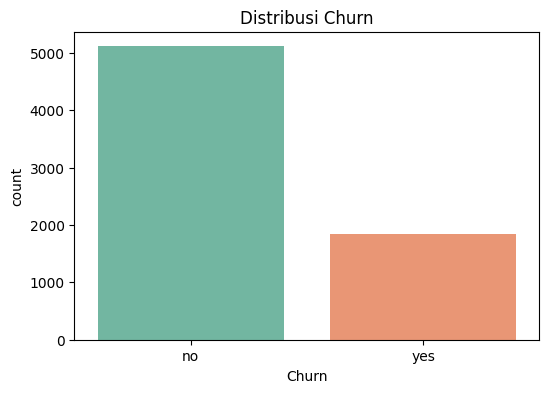

In [19]:
# 2. Distribusi target (Churn)
plt.figure(figsize=(6,4))
sns.countplot(data=data, x="Churn", palette="Set2")
plt.title("Distribusi Churn")
plt.show()


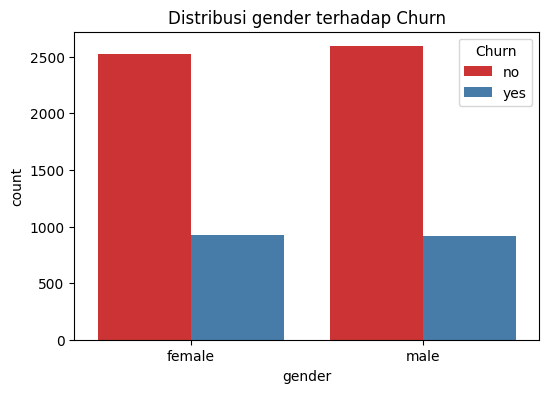

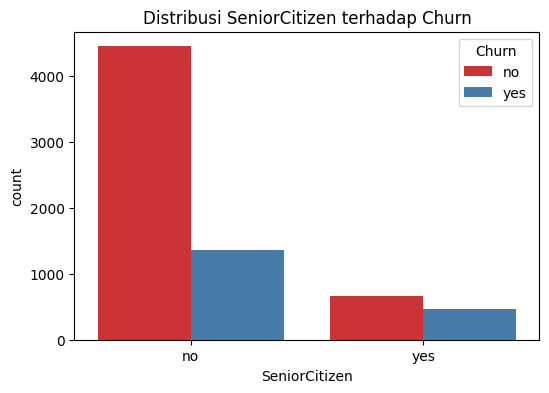

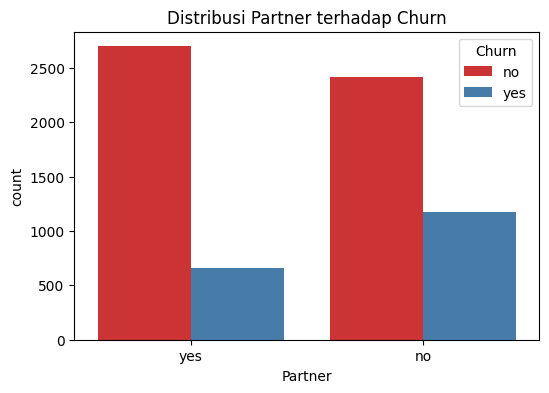

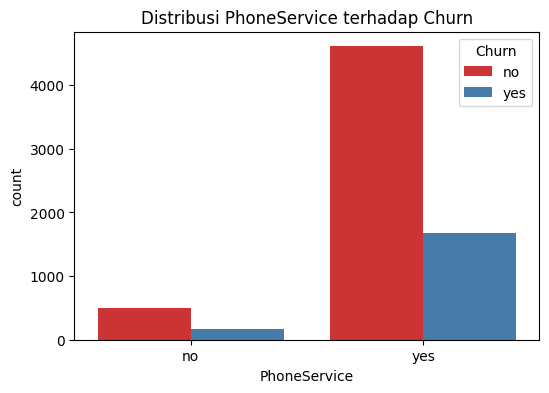

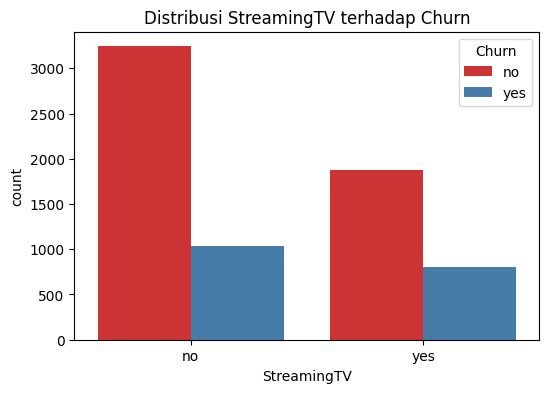

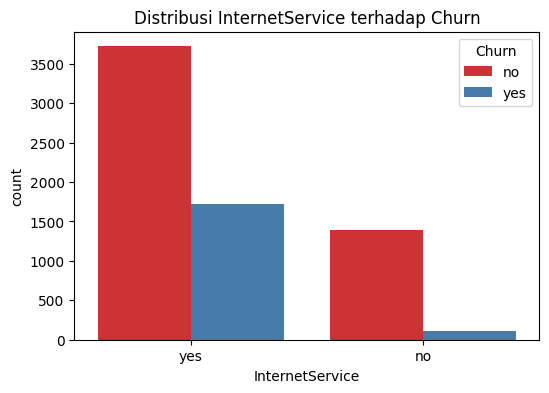

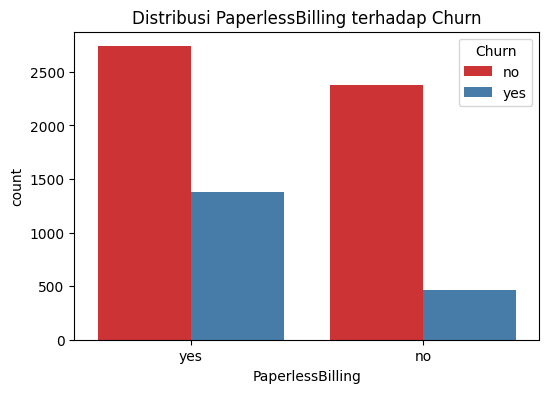

In [20]:
# 3. Distribusi kategorikal
categorical_cols = ["gender", "SeniorCitizen", "Partner",
                    "PhoneService", "StreamingTV",
                    "InternetService", "PaperlessBilling"]

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=data, x=col, hue="Churn", palette="Set1")
    plt.title(f"Distribusi {col} terhadap Churn")
    plt.show()


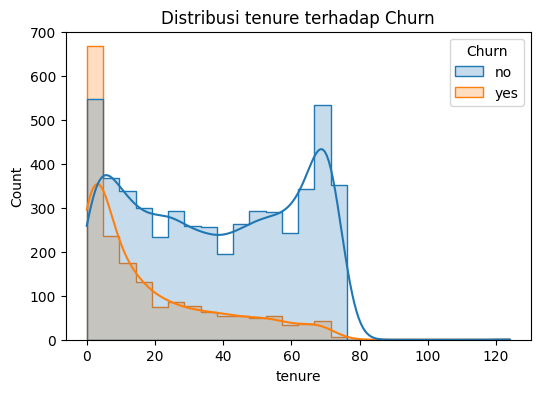

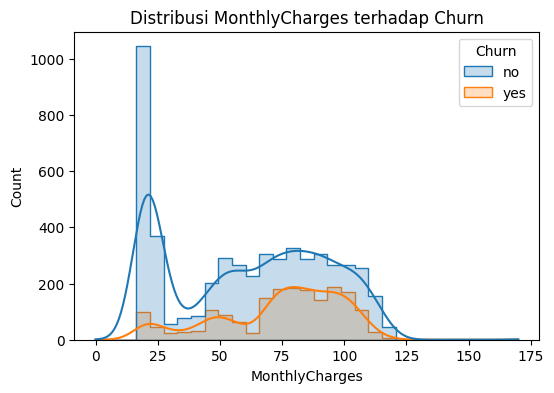

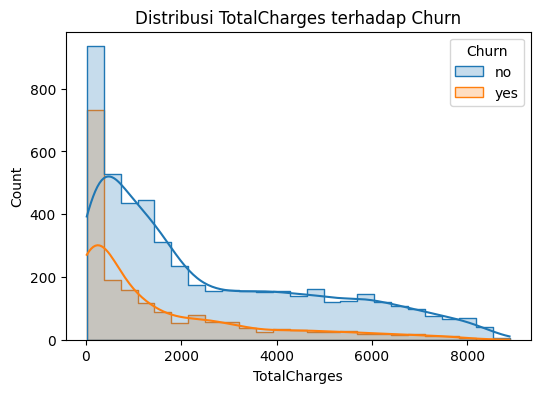

In [21]:
# 4. Distribusi numerik
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, hue="Churn", kde=True, element="step")
    plt.title(f"Distribusi {col} terhadap Churn")
    plt.show()


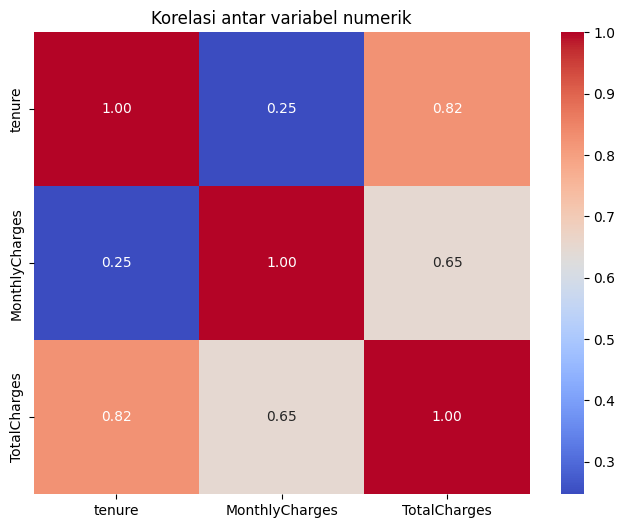

In [22]:
# 5. Korelasi numerik
plt.figure(figsize=(8,6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar variabel numerik")
plt.show()


/tmp/ipython-input-3046292040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Churn", y=col, palette="Set3")


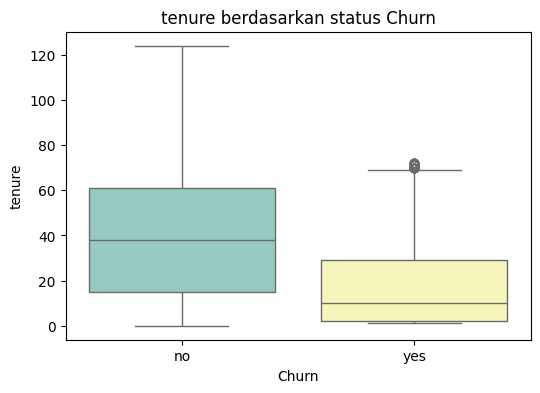

/tmp/ipython-input-3046292040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Churn", y=col, palette="Set3")


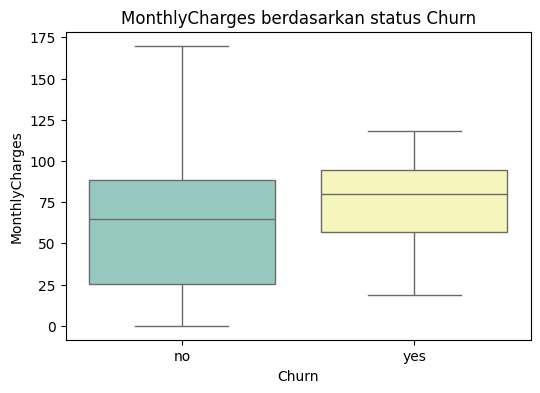

/tmp/ipython-input-3046292040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="Churn", y=col, palette="Set3")


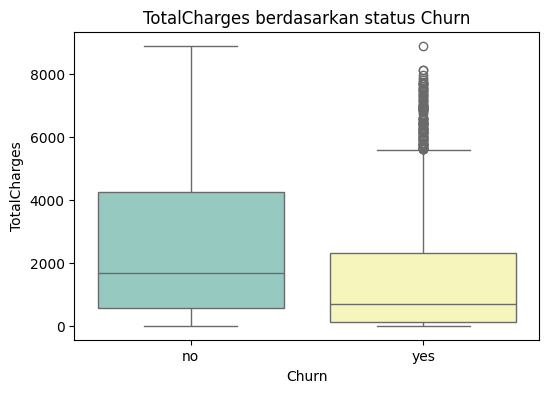

In [23]:
# ----- 6. Boxplot numerik vs Churn -----
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=data, x="Churn", y=col, palette="Set3")
    plt.title(f"{col} berdasarkan status Churn")
    plt.show()